# Lecture 9: Approximation Integration 

## Example 2.8.1:
We first compute $A = \displaystyle\int^2_1\dfrac{1}{x}\;dx$.

In [1]:
import scipy.integrate as integrate
import scipy.special as special

f =  lambda x: 1/x
A = integrate.quad(f, 1, 2)[0]
round(A,6)

0.693147

In [2]:
import numpy as np

def Riemann_sum(f, a, b, n, alpha):
    x = np.zeros(n+1,float) # Initialize the mesh points
    h = (b-a)/n             # Calculate the step size
    sum = 0                 # Initialize the Riemann Sum 
    for i in range(n+1):
        x[i] = a + i*h
    for i in range(n):
        sample = (1-alpha)*x[i] + alpha*x[i+1]
        sum += f(sample)
    return sum*h

In [3]:
def Right(f, a, b, n):
    return Riemann_sum(f, a, b, n, alpha=1)
def Left(f, a, b, n):
    return Riemann_sum(f, a, b, n, alpha=0)
def Mid(f, a, b, n):
    return Riemann_sum(f, a, b, n, alpha=0.5)

In [4]:
from pandas import DataFrame
from math import *

R = []
L = []
M = []
E_R = []
E_L = []
E_M = []
n = []
for index in (2, 4, 10, 20, 40, 80, 100):
    n.append(index)
    R.append(Right(f, 1, 2, index))
    L.append(Left(f, 1, 2, index))
    M.append(Mid(f, 1, 2, index))
    E_R.append(A - Right(f, 1, 2, index))
    E_L.append(A - Left(f, 1, 2, index))
    E_M.append(A - Mid(f, 1, 2, index))

# Convert to Arrays
R = np.asarray(R)
L = np.asarray(L)
M = np.asarray(M)
E_R = np.asarray(E_R)
E_L = np.asarray(E_L)
E_M = np.asarray(E_M)


table = {'$n $': n, '$R_n$': R, '$L_n$': L, '$M_n$': M,
        '$E_R$': E_R, '$E_L$': E_L, '$E_M$': E_M}
DataFrame(table)

,$n $,$R_n$,$L_n$,$M_n$,$E_R$,$E_L$,$E_M$
0,2,0.583333,0.833333,0.685714,0.109814,-0.140186,0.007433
1,4,0.634524,0.759524,0.691220,0.058623,-0.066377,0.001927
2,10,0.668771,0.718771,0.692835,0.024376,-0.025624,0.000312
3,20,0.680803,0.705803,0.693069,0.012344,-0.012656,0.000078
4,40,0.686936,0.699436,0.693128,0.006211,-0.006289,0.000020
5,80,0.690032,0.696282,0.693142,0.003115,-0.003135,0.000005
6,100,0.690653,0.695653,0.693144,0.002494,-0.002506,0.000003


## Example 2.8.2: 

We next use Trapezoidal Rule to estimate $A = \displaystyle\int^2_1\dfrac{1}{x}\;dx$.

In [5]:
def Trap(f, a, b, n):
    return 0.5*Left(f, a, b, n) + 0.5*Right(f, a, b, n)

In [6]:
T = []
E_T = []
for index in (2, 4, 10, 20, 40, 80, 100):
    T.append(Trap(f, 1, 2, index))
    E_T.append(A - Trap(f, 1, 2, index))
    
M = np.asarray(M)
E_T = np.asarray(E_T)

table1 = {'$n $': n, '$T_n$': T, '$M_n$': M,
        '$E_T$': E_T, '$E_M$': E_M}
DataFrame(table1)


,$n $,$T_n$,$M_n$,$E_T$,$E_M$
0,2,0.708333,0.685714,-0.015186,0.007433
1,4,0.697024,0.691220,-0.003877,0.001927
2,10,0.693771,0.692835,-0.000624,0.000312
3,20,0.693303,0.693069,-0.000156,0.000078
4,40,0.693186,0.693128,-0.000039,0.000020
5,80,0.693157,0.693142,-0.000010,0.000005
6,100,0.693153,0.693144,-0.000006,0.000003


Let us plot the Left Endpoint, Right Endpoit, Midpoint, and Trapezoidal Rules for $f(x) = \dfrac{1}{x}$  on $[1,2]$.

In [7]:
import matplotlib.pyplot as plt

def graph_LRMT(f, a, b, N, rule):
    # x and y values for the rule
    x = np.linspace(a,b,N+1)
    y = f(x)

    # X and Y values for plotting y=f(x)
    X = np.linspace(a,b,100)
    Y = f(X)
    plt.plot(X,Y)
    
    for i in range(N):
        xs = [x[i],x[i],x[i+1],x[i+1]]
        if rule == 'L':
            ys = [0, f(x[i]), f(x[i]), 0]
            plt.title('Left Endpoint Rule, N = {}'.format(N))
        elif rule == 'R':
            ys = [0, f(x[i+1]), f(x[i+1]), 0]
            plt.title('Right Endpoint Rule, N = {}'.format(N))
        elif rule == 'M':
            ys = [0, f(0.5*x[i]+0.5*x[i+1]),f(0.5*x[i]+0.5*x[i+1]),0]
            plt.title('Midpoint Rule, N = {}'.format(N))
        elif rule == 'T':
            ys = [0,f(x[i]),f(x[i+1]),0]
            plt.title('Trapezoidal Rule, N = {}'.format(N))
        plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

    plt.show()    

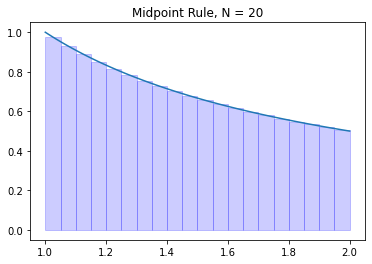

In [8]:
f = lambda x : 1/x
graph_LRMT(f, a=1, b=2, N=20, rule = 'M')

## Comparison Between Numerical Methods

We next write a code to output the number of iterations needed to guarantee that our approximations for definite integrals are accurate to within the given tolerance $\epsilon$.

In [9]:
def iteration_Left(f, a, b, tol):
    iteration = 1
    while abs(Left(f, a, b, iteration) - Left(f, a, b, iteration+1)) > tol:
        iteration +=1
    return iteration 

def iteration_Right(f, a, b, tol):
    iteration = 1
    while abs(Right(f, a, b, iteration) - Right(f, a, b, iteration+1)) > tol:
        iteration +=1
    return iteration

def iteration_Mid(f, a, b, tol):
    iteration = 1
    while abs(Mid(f, a, b, iteration) - Mid(f, a, b, iteration+1)) > tol:
        iteration +=1
    return iteration

def iteration_Trap(f, a, b, tol):
    iteration = 1
    while abs(Trap(f, a, b, iteration) - Trap(f, a, b, iteration+1)) > tol:
        iteration +=1
    return iteration

Let's try to test with $f(x)=1/x$ and $A=\displaystyle\int^2_11/x\;dx$.

In [10]:
f = lambda x: 1/x
a = 1
b = 2
tol = 10**(-4)

# Output the number of iterations 
i_l, i_r, i_m, i_t = iteration_Left(f, a, b, tol), iteration_Right(f, a, b, tol), \
iteration_Mid(f, a, b, tol), iteration_Trap(f, a, b, tol)

print('Number of iteration in Left Endpoint Rule = %d' %i_l, \
      '\nNumber of iteration in Right Endpoint Rule = %d' %i_r,\
      '\nNumber of iteration in Midpoint Rule = %d' %i_m,\
      '\nNumber of iteration in Trapezoid Rule = %d' %i_t)
    

Number of iteration in Left Endpoint Rule = 50 
Number of iteration in Right Endpoint Rule = 50 
Number of iteration in Midpoint Rule = 9 
Number of iteration in Trapezoid Rule = 11


## Example 2.8.4:

If we use Theorem 2.8.3 estimating the error bounds for the Trapezoidal and Midpoint Rules to compute the number of iterations $n$ needed to perform to guarantee that our approximations for $A$ are accurate to within 0.0001, we can get $n=41$ and $n=29$.

In [11]:
T_1 = Trap(f, 1, 2, 41)
M_1 = Mid(f, 1, 2, 30)
print(T_1, M_1)

0.6931843580458765 0.6931124667719675


In [12]:
T_2 = Trap(f, 1, 2, 11)
M_2 = Mid(f, 1, 2, 9)
print(T_2, M_2)

0.6936631780672029 0.6927624129685918


It looks like Theorem 2.8.3 gives us a more precise result.

In order to find the number of iteration $n$ needed to perform to guarantee that our approximations for $A$ are accurate to within the given degree of accuracy $\epsilon$ using Theorem 2.8.3, we should solve the following inequality:

1. For Trapezoidal Rule $\dfrac{M(b-a)^3}{12n^2} \le \epsilon \iff n\ge \sqrt{\dfrac{M(b-a)^3}{12\epsilon}}$
2. For Midpoint Rule $\dfrac{M(b-a)^3}{24n^2} \le \epsilon \iff n\ge\sqrt{\dfrac{M(b-a)^3}{24\epsilon}}$

where $M = \max_{x\in[a,b]}|f''(x)|$.


To proceed, we first write a code to compute the second derivative. 

In [13]:
import sympy as sp

x, t = sp.symbols('x t')

def second_der(f, variable):
    f_prime = sp.diff(f, variable)
    f_dprime = sp.diff(f_prime, variable)
    return f_dprime

In [14]:
f = 1/x
f_dprime = second_der(f,x)
f_dprime


2/x**3

It's not hard to see that $M = \max_{x\in[1,2]}|f''(x)| = 2$.

In [15]:
import numpy as np

M = 2
a = 1
b = 2
tol = 0.0001
nfrac = np.sqrt(M*(b-a)**3/(12*tol))
n_T = int(nfrac)+1
print('The number of iterations needed to perform to guarantee that the Trapezoidal approximation \
for the given intergal is accurate to within 0.0001 is %d.' %n_T)

The number of iterations needed to perform to guarantee that the Trapezoidal approximation for the given intergal is accurate to within 0.0001 is 41.


In [16]:
nfrac = np.sqrt(M*(b-a)**3/(24*tol))
n_M = int(nfrac)+1
print('The number of iterations needed to perform to guarantee that the Midpoint approximation \
for the given intergal is accurate to within 0.0001 is %d.' %n_M)

The number of iterations needed to perform to guarantee that the Midpoint approximation for the given intergal is accurate to within 0.0001 is 29.


## Example 2.8.5:

Approximate $A = \displaystyle\int^1_0e^{x^2}\;dx$ using Midpoint Rule with $n=10$.

In [17]:
import numpy as np

f = lambda x: np.exp(x**2)
M_10 = Mid(f, a=0, b=1, n=10)
M_10

1.4603930909600458

Let us plot the Midpoint Rules for $f(x) = e^{x^2}$  on $[0,1]$.

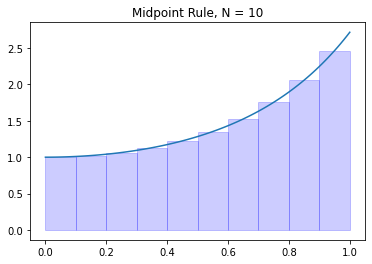

In [18]:
graph_LRMT(f, a=0, b=1, N=10, rule = 'M')

## Simpson's Rule 

In [19]:
def Simp(f, a, b, n):
    h = (b-a)/n
    S = f(a) + f(b)
    S_1 = 0
    S_2 = 0
    for i in range(1,n):
        x = a + i*h
        if i%2 == 0:
            S_2 += f(x)
        else:
            S_1 += f(x)
    return h*(S + 2*S_2 + 4*S_1)/3

## Example 2.8.8:
Approximate $A = \displaystyle\int^2_1\dfrac{1}{x}\;dx$ using Simpson's Rule with $n=4, 10$.


In [20]:
f = lambda x: 1/x
S_4 = Simp(f, a=1, b=2, n=4)
S_10 = Simp(f, a=1, b=2, n=10)
print(S_4)
print(S_10)

0.6932539682539683
0.6931502306889303


In [21]:
def iteration_Simp(f, a, b, tol):
    iteration = 2
    while abs(Simp(f, a, b, iteration) - Simp(f, a, b, iteration+2)) > tol:
        iteration +=2
    return iteration

In [22]:
i_s = iteration_Simp(f, a=1, b=2, tol=10**(-4))
i_s

4

If we use Theorem 2.8.7 estimating the error bounds for Simpson's Rule to compute the number of iterations $n$ needed to perform to guarantee that our approximations for $A$ are accurate to within 0.0001, we can get $n=8$.

In [23]:
S_8 = Simp(f, a=1, b=2, n=8)
S_8

0.6931545306545307

It looks like Theorem 2.8.7 gives us a more precise result.

In order to find the number of iteration $n$ needed to perform to guarantee that our Simpson's approximations for $A$ are accurate to within the given degree of accuracy $\epsilon$ using Theorem 2.8.7, we should solve the following inequality:
$$
\dfrac{M(b-a)^5}{180n^4} \le \epsilon \iff n\ge \sqrt[4]{\dfrac{M(b-a)^5}{180\epsilon}}
$$

To proceed, we first write a code to compute the fourth derivative. 

In [24]:
x, t = sp.symbols('x t')

def Nth_der(f, variable, N):
    f_0 = f
    for k in range(N):
        f_prime = sp.diff(f_0,variable)
        f_0 = f_prime
    return f_0

In [25]:
f = 1/x
f_4prime = Nth_der(f, x, 4)
f_4prime

24/x**5

It's not hard to see that $M = \max_{x\in[1,2]}|f^{(4)}(x)| = 24$.

In [26]:
M = 24
a = 1
b = 2
tol = 0.0001
nfrac = (M*(b-a)**5/(180*tol))**(1/4)
n_S = int(nfrac)+2
print('The number of iterations needed to perform to guarantee that the Simpson approximation \
for the given intergal is accurate to within 0.0001 is %d.' %n_S)

The number of iterations needed to perform to guarantee that the Simpson approximation for the given intergal is accurate to within 0.0001 is 8.


## Example 2.8.9: 
Do by yourself.

Let's try to examine the behavior of $L_n, R_n, M_n, T_n, S_n$ in the long run.

In [27]:
# Define R_n, L_n, M_n
R = lambda n: Right(f, a, b, n)
L = lambda n: Left(f, a, b, n)
M = lambda n: Mid(f, a, b, n)
T = lambda n: Trap(f, a, b, n)
M = lambda n: Simp(f, a, b, n)

Let's test with $f(x)=1/x$ and $A=\displaystyle \int^2_11/x\;dx$.

In [28]:
f = lambda x: 1/x
a = 1
b = 2

R_n = []
L_n = []
M_n = []
T_n = []
S_n = []
n = []

for index in (4, 6, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200):
    n.append(index)
    R_n.append(R(index))
    L_n.append(L(index))
    M_n.append(M(index))
    T_n.append(M(index))
    S_n.append(M(index))
    
table2 = {'$n $': n, '$R_n$': R_n, '$L_n$': L_n, '$M_n$': M_n, '$T_n$': T_n, '$S_n$': S_n}
DataFrame(table2)

,$n $,$R_n$,$L_n$,$M_n$,$T_n$,$S_n$
0,4,0.634524,0.759524,0.693254,0.693254,0.693254
1,6,0.653211,0.736544,0.693170,0.693170,0.693170
2,10,0.668771,0.718771,0.693150,0.693150,0.693150
3,20,0.680803,0.705803,0.693147,0.693147,0.693147
4,30,0.684883,0.701550,0.693147,0.693147,0.693147
5,40,0.686936,0.699436,0.693147,0.693147,0.693147
6,50,0.688172,0.698172,0.693147,0.693147,0.693147
7,60,0.688998,0.697331,0.693147,0.693147,0.693147
8,70,0.689589,0.696731,0.693147,0.693147,0.693147
9,80,0.690032,0.696282,0.693147,0.693147,0.693147


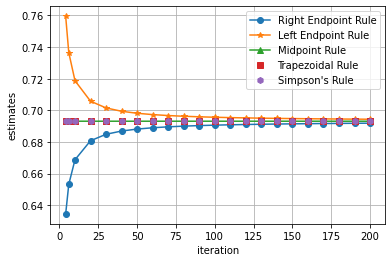

In [29]:
import matplotlib.pyplot as plt

plt.plot(n, R_n, '-o', label = "Right Endpoint Rule")
plt.plot(n, L_n, '-*',label = "Left Endpoint Rule")
plt.plot(n, M_n, '-^', label = "Midpoint Rule")
plt.plot(n, T_n, 's', label = "Trapezoidal Rule")
plt.plot(n, S_n, 'h', label = "Simpson's Rule")

plt.xlabel('iteration')
plt.ylabel('estimates')
plt.grid(True)
plt.legend()
plt.show()

## Your Turn: 
Do with $f(x)=e^{x^2}$ and $A=\displaystyle \int^1_0 e^{x^2}\;dx$.

In [30]:
# Enter your code here
